In [8]:
import numpy as np

# https://blog.csdn.net/wxplol/article/details/122360840
def get_arc_curve(pts):
	'''
	获取弧度值
	:param pts:
	:return:
	'''

	# 计算弦长
	symb = 1
	start = np.array(pts[0])
	end = np.array(pts[len(pts) - 1])
	if (end[0]-start[0] > 0) and (end[1]-start[1] > 0):
		symb = -1
	elif (end[0]-start[0] < 0) and (end[1]-start[1] < 0):
		symb = -1
	l_arc = np.sqrt(np.sum(np.power(end - start, 2)))

	# 计算弧上的点到直线的最大距离
	# 计算公式：\frac{1}{2a}\sqrt{(a+b+c)(a+b-c)(a+c-b)(b+c-a)}
	a = l_arc
	b = np.sqrt(np.sum(np.power(pts - start, 2), axis=1))
	c = np.sqrt(np.sum(np.power(pts - end, 2), axis=1))
	dist = np.sqrt((a + b + c) * (a + b - c) * (a + c - b) * (b + c - a)) / (2 * a)
	h = dist.max()

	# 计算曲率
	r = ((a * a) / 4 + h * h) / (2 * h)

	return symb * 1/r


if __name__ == '__main__':
	x = np.linspace(1, 100, 99).astype(np.int64)
	y = (x ** 2)
	xy = list(zip(x, y))  # list of points in 2D space
	print("%.5f"%get_arc_curve(xy))
    # kappa = 


515290.95408


In [2]:
# 知远：plot_trajectory_curvature.py
x = np.linspace(1, 100, 99).astype(np.int64)
y = (x ** 2)
path = np.array(list(zip(x, y)) ) # list of points in 2D space
# path[:,0]
# f1 为各项的系数，3 表示想要拟合的最高次项是多少。
x = np.array(path[0:20][0])
y = np.array(path[0:20][1])
# k_org = np.array(path[0:20][3])

f1 = np.polyfit(x, y, 3)
# p1 为拟合的多项式表达式
p1 = np.poly1d(f1)
print('p1 is :\n',p1)
ydot = np.poly1d([f1[0]*3, f1[1]*2, f1[2]])
ydotdot = np.poly1d([f1[0]*6, f1[1]*2])
k = ydotdot(x) / np.float_power((1 + ydot(x)*ydot(x)), 1.5)
print("k_org", "k","diff")
# print(k_org)
print(k)
# print(k-k_org)

# fig, _ = plt.subplots(2, 1)
# ax_ = plt.subplot(2, 1, 1)
# plt.cla()
# plt.plot(x, y, 's',label='original values')
# yvals = p1(x) #拟合y值
# plt.plot(x, yvals, 'r',label='polyfit values')

# ax_ = plt.subplot(2, 1, 2)
# plt.plot(x, k_org, 'b.-',label='original kappa')
# plt.plot(x, k, 'r.-',label='polyfit kappa')
# plt.show()

p1 is :
       3        2
0.75 x + 0.75 x + 0.75 x + 0.75
k_org k diff
[0.06125095 0.06125095]


/home/mono/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [30]:
def cal_kappa_polyfit(path):
    import math
    x = np.array(path[:,0])   # 最好是分过段的 20个点一段
    y = np.array(path[:,1])
    # f1 为各项的系数，3 表示想要拟合的最高次项是多少。
    # f1 = np.polyfit(x, y, 3)
    # # p1 为拟合的多项式表达式
    # p1 = np.poly1d(f1)
    # # print('p1 is :\n',p1)
    # # 导数
    # ydot = np.poly1d([f1[0]*3, f1[1]*2, f1[2]])
    # ydotdot = np.poly1d([f1[0]*6, f1[1]*2])


    f1 = np.polyfit(x, y, 5)
    # p1 为拟合的多项式表达式
    p1 = np.poly1d(f1)
    # print('p1 is :\n',p1)
    # 导数
    ydot = np.poly1d([f1[0]*5, f1[1]*4, f1[2]*3, f1[3]*2, f1[4]])
    ydotdot = np.poly1d([f1[0]*20, f1[1]*12, f1[2]*6, f1[3]*2])

    k = ydotdot(x) / np.float_power((1 + ydot(x)*ydot(x)), 1.5)

    thetaList = []
    for x_t in x:
        tk = ydot(x_t)
        theta = math.atan(tk)
        if (x[-1] - x[0]) < 0:
            theta -= math.pi
            
        if theta < -1*math.pi:
            theta = -1*math.pi
        elif theta > math.pi:
            theta = math.pi
        thetaList.append(theta)
    assert len(thetaList) == len(x)
    # print("="*50)
    # print(k)
    # print(len(k))
    return k[0], thetaList

    
def get_kappa_polyfit(xy):
    xy = np.array(xy)
    kappa = []
    step = 20  # 分段
    for i in range(0, len(xy), 1):
        path = xy[i:i+step]
        tmpK ,_ = cal_kappa_polyfit(path)
        kappa.append(tmpK)
    while len(kappa) < len(xy):
        kappa.append(kappa[-1])
    assert len(kappa) == len(xy)
    return kappa


def get_kappa_polyfit_t(xy):
    """
    插值
    """
    xy = np.array(xy)
    kappa = [0]
    thetaList = []
    step = 20  # 分段
    for i in range(0, len(xy), step):
        path = xy[i:i+step]
        endK , tmpThetaList= cal_kappa_polyfit(path)
        startK = kappa[-1]
        tmpK = np.interp(np.linspace(0, 1, step), [0,1], [startK,endK])
        kappa += list(tmpK[1:])
        thetaList += tmpThetaList
    while len(kappa) < len(xy):
        kappa.append(kappa[-1])
    assert len(kappa) == len(xy) and len(thetaList) == len(xy)
    return kappa, thetaList

In [31]:
x = np.linspace(1, 100, 99).astype(np.int64)
y = (x ** 2)
path = np.array(list(zip(x, y)) ) # list of points in 2D space

# kappa ,thetaList= get_kappa_polyfit_t(path)
kappa = get_kappa_polyfit(path)
kappa

/home/mono/.local/lib/python3.6/site-packages/ipykernel_launcher.py:50: RankWarning: Polyfit may be poorly conditioned
/home/mono/.local/lib/python3.6/site-packages/ipykernel_launcher.py:50: RankWarning: Polyfit may be poorly conditioned
/home/mono/.local/lib/python3.6/site-packages/ipykernel_launcher.py:50: RankWarning: Polyfit may be poorly conditioned
/home/mono/.local/lib/python3.6/site-packages/ipykernel_launcher.py:50: RankWarning: Polyfit may be poorly conditioned
/home/mono/.local/lib/python3.6/site-packages/ipykernel_launcher.py:50: RankWarning: Polyfit may be poorly conditioned


[0.17888543819999425,
 0.028533602945449054,
 0.008886431746235601,
 0.003816453371975993,
 0.0019703706736833755,
 0.0011454548945343036,
 0.0007233203044457805,
 0.0004854341335033657,
 0.00034135396690780824,
 0.00024906542116659436,
 0.00018724808626247936,
 0.00014429998167134853,
 0.0001135395039917298,
 9.093383570041914e-05,
 7.395078852972708e-05,
 6.0945858298002996e-05,
 5.0819449614336473e-05,
 4.2817374310488956e-05,
 3.6410632648065044e-05,
 3.12207259964981e-05,
 2.6971986341400265e-05,
 2.3460408211963376e-05,
 2.0532825138605022e-05,
 1.807272336818594e-05,
 1.5990404797758743e-05,
 1.4216054884542746e-05,
 1.2694785057260996e-05,
 1.1383038837671868e-05,
 1.0245953789505366e-05,
 9.255402573726849e-06,
 8.388522610280399e-06,
 7.62660141593305e-06,
 6.954223684308791e-06,
 6.3586129478365205e-06,
 5.8291192747789705e-06,
 5.356817547061195e-06,
 4.934190176018368e-06,
 4.5548748036304945e-06,
 4.213462391148519e-06,
 3.905334651438803e-06,
 3.6265324065405086e-06,
 3.

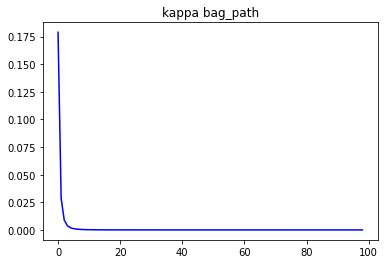

In [35]:
import matplotlib.pyplot as plt
plt.plot(kappa,c='b')
# plt.plot(path[:,0], path[:,1],c='r')
# plt.plot(x,y,'r')
plt.title("kappa bag_path")
plt.show()

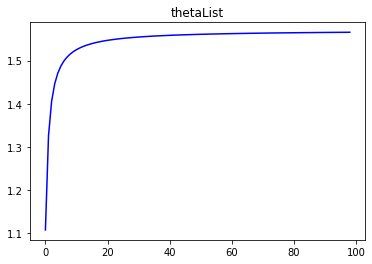

In [33]:
import matplotlib.pyplot as plt
plt.plot(thetaList,c='b')
# plt.plot(x,y,'r')
plt.title("thetaList")
plt.show()